## Import libraries

In [913]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import scipy.stats as stats

from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.preprocessing import OrdinalEncoder,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import TruncatedSVD,PCA
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import mutual_info_classif
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score


## Import Train Dataset

In [914]:
train = pd.read_csv('/Users/siddhanthkalyanpur/Documents/CS584/HW4/train.csv', skipinitialspace = True)

## Exploratory Data Analysis

In [915]:
train.shape

(32561, 14)

We can see that there are 32561 instances and 15 attributes in the data set.

In [916]:
train.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [917]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   education       32561 non-null  object
 3   education-num   32561 non-null  int64 
 4   marital-status  32561 non-null  object
 5   occupation      32561 non-null  object
 6   relationship    32561 non-null  object
 7   race            32561 non-null  object
 8   sex             32561 non-null  object
 9   capital-gain    32561 non-null  int64 
 10  capital-loss    32561 non-null  int64 
 11  hours-per-week  32561 non-null  int64 
 12  native-country  32561 non-null  object
 13  income          32561 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.5+ MB


In [918]:
train.replace("?", '0', inplace = True)

In [919]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   education       32561 non-null  object
 3   education-num   32561 non-null  int64 
 4   marital-status  32561 non-null  object
 5   occupation      32561 non-null  object
 6   relationship    32561 non-null  object
 7   race            32561 non-null  object
 8   sex             32561 non-null  object
 9   capital-gain    32561 non-null  int64 
 10  capital-loss    32561 non-null  int64 
 11  hours-per-week  32561 non-null  int64 
 12  native-country  32561 non-null  object
 13  income          32561 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.5+ MB


In [923]:
train.isna().sum()

age               0
workclass         0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

### Setting feature vector and target variable

In [924]:
X = train.drop(['income'], axis=1)
y_temp = train['income']

In [925]:
X.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


### Encoding for Income Feature

In [885]:
y = []
for i in y_temp:
    if i =='<=50K':
        y.append(0)
    else:
          y.append(1)

In [887]:
y = pd.DataFrame(y)

In [889]:
X_fairness = X
y_fairness = y

In [890]:
X_fairness.tail(10)


,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
32551,32,Private,10th,6,Married-civ-spouse,Handlers-cleaners,Husband,Amer-Indian-Eskimo,Male,0,0,40,United-States
32552,43,Private,Assoc-voc,11,Married-civ-spouse,Sales,Husband,White,Male,0,0,45,United-States
32553,32,Private,Masters,14,Never-married,Tech-support,Not-in-family,Asian-Pac-Islander,Male,0,0,11,Taiwan
32554,53,Private,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States
32555,22,Private,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States
32556,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States
32557,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States
32558,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States
32559,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States
32560,52,Self-emp-inc,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States


In [891]:
y.tail(10)

,0
32551,0
32552,0
32553,0
32554,1
32555,0
32556,0
32557,1
32558,0
32559,0
32560,1


## Feature Engineering

In [892]:
categorical = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']
for feature in categorical:
        le = LabelEncoder()
        X[feature] = le.fit_transform(X[feature])

In [893]:
X.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,7,9,13,4,1,1,4,1,2174,0,40,39
1,50,6,9,13,2,4,0,4,1,0,0,13,39
2,38,4,11,9,0,6,1,4,1,0,0,40,39
3,53,4,1,7,2,6,0,2,1,0,0,40,39
4,28,4,9,13,2,10,5,2,0,0,0,40,5


## Feature Scaling

In [771]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)

In [894]:
# X_train.head()
X.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,7,9,13,4,1,1,4,1,2174,0,40,39
1,50,6,9,13,2,4,0,4,1,0,0,13,39
2,38,4,11,9,0,6,1,4,1,0,0,40,39
3,53,4,1,7,2,6,0,2,1,0,0,40,39
4,28,4,9,13,2,10,5,2,0,0,0,40,5


## Import Test Dataset

In [821]:
test = pd.read_csv('/Users/siddhanthkalyanpur/Documents/CS584/HW 4/test.csv', skipinitialspace = True)

## Exploratory Data Analysis

In [475]:
test.shape

(16281, 13)

In [476]:
test = test.replace("?", "np.Nan")

In [477]:
for col in ['workclass', 'occupation', 'native-country']:
    test[col].fillna(test[col].mode()[0], inplace=True)

In [478]:
categorical = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']
for feature in categorical:
        le = LabelEncoder()
        test[feature] = le.fit_transform(test[feature])

In [479]:
scaler = StandardScaler()
test = pd.DataFrame(scaler.fit_transform(test), columns = test.columns)

## Logistic Regression  

In [164]:

logreg = LogisticRegression()

logreg.fit(X, y)
y_logreg = logreg.predict(test)

/usr/local/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [165]:
pd.DataFrame(y_logreg).value_counts()

0    13811
1     2470
dtype: int64

In [166]:
pd.DataFrame(y_logreg).value_counts()

0    13811
1     2470
dtype: int64

In [167]:
sentimentFileWriter = open("output_logreg.txt", "w")
sentimentFileWriter.writelines("%s\n" % sentiment for sentiment in y_logreg)
sentimentFileWriter.close()

## Cat Boost

In [89]:
clf= CatBoostClassifier(learning_rate=0.04)

clf.fit(X,y)

y_cat = clf.predict(test)

0:	learn: 0.6542617	total: 79.5ms	remaining: 1m 19s
1:	learn: 0.6207959	total: 84.9ms	remaining: 42.4s
2:	learn: 0.5870556	total: 95.1ms	remaining: 31.6s
3:	learn: 0.5595157	total: 103ms	remaining: 25.5s
4:	learn: 0.5329856	total: 109ms	remaining: 21.8s
5:	learn: 0.5092692	total: 115ms	remaining: 19s
6:	learn: 0.4892640	total: 123ms	remaining: 17.4s
7:	learn: 0.4748401	total: 129ms	remaining: 16s
8:	learn: 0.4595818	total: 135ms	remaining: 14.8s
9:	learn: 0.4470705	total: 141ms	remaining: 13.9s
10:	learn: 0.4344982	total: 160ms	remaining: 14.4s
11:	learn: 0.4238004	total: 169ms	remaining: 13.9s
12:	learn: 0.4164017	total: 175ms	remaining: 13.3s
13:	learn: 0.4070142	total: 180ms	remaining: 12.7s
14:	learn: 0.4001933	total: 186ms	remaining: 12.2s
15:	learn: 0.3933499	total: 193ms	remaining: 11.8s
16:	learn: 0.3874378	total: 198ms	remaining: 11.5s
17:	learn: 0.3809065	total: 206ms	remaining: 11.2s
18:	learn: 0.3761511	total: 213ms	remaining: 11s
19:	learn: 0.3727370	total: 217ms	remaining

In [90]:
pd.DataFrame(y_cat).value_counts()

0    13301
1     2980
dtype: int64

In [93]:
sentimentFileWriter = open("output_cat.txt", "w")
sentimentFileWriter.writelines("%s\n" % sentiment for sentiment in y_cat)
sentimentFileWriter.close()

## Random Forest

In [69]:
max_features = np.array([1,2,3,4,5])
n_estimators = np.array([50,100,150,200,250])
randomForest = RandomForestClassifier(max_features=5, n_estimators=250,random_state=27, class_weight={0:1, 1:1.5}, criterion='entropy')
randomForest.fit(X, y)
y_rf = randomForest.predict(test)

/var/folders/rd/wm2slzb53hs1_y4mhlc9ctvh0000gn/T/ipykernel_61306/203418708.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  randomForest.fit(X, y)


In [70]:
pd.DataFrame(y_rf).value_counts()

0    12426
1     3855
dtype: int64

In [71]:
sentimentFileWriter = open("output_rf.txt", "w")
sentimentFileWriter.writelines("%s\n" % sentiment for sentiment in y_rf)
sentimentFileWriter.close()

## Decision Tree 


In [72]:

DecisionTree = DecisionTreeClassifier(max_depth=7, random_state=27)
DecisionTree.fit(X, y)
y_dt = DecisionTree.predict(test)

In [73]:
pd.DataFrame(y_dt).value_counts()

0    13753
1     2528
dtype: int64

In [74]:
pd.DataFrame(y_dt).value_counts()

0    13753
1     2528
dtype: int64

In [75]:
sentimentFileWriter = open("output_dt.txt", "w")
sentimentFileWriter.writelines("%s\n" % sentiment for sentiment in y_dt)
sentimentFileWriter.close()

## KNN

In [94]:
knn = KNeighborsClassifier()
knn.fit(X,y)
y_knn=knn.predict(test)

/usr/local/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [95]:
pd.DataFrame(y_knn).value_counts()

0    12726
1     3555
dtype: int64

In [96]:
sentimentFileWriter = open("output_knn", "w")
sentimentFileWriter.writelines("%s\n" % sentiment for sentiment in y_knn)
sentimentFileWriter.close()

## Ada Boost

In [79]:
abc = AdaBoostClassifier(base_estimator= DecisionTreeClassifier(), n_estimators=100)
adaBoost = abc.fit(X, y)
y_ada = adaBoost.predict(test)

/usr/local/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [80]:
pd.DataFrame(y_ada).value_counts()

0    12778
1     3503
dtype: int64

In [81]:
sentimentFileWriter = open("output_ada", "w")
sentimentFileWriter.writelines("%s\n" % sentiment for sentiment in y_ada)
sentimentFileWriter.close()

## SVM

In [82]:
svm = LinearSVC(random_state = 27, max_iter=1000)
svm.fit(X, y)
y_svm = svm.predict(test)

/usr/local/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [83]:
pd.DataFrame(y_svm).value_counts()

0    14083
1     2198
dtype: int64

In [85]:
sentimentFileWriter = open("output_svm", "w")
sentimentFileWriter.writelines("%s\n" % sentiment for sentiment in y_svm)
sentimentFileWriter.close()

# Part 2 - Fairness Diagnosis

In [842]:
X_fairness['race'] = [1 if r=='White' else 0 for r in X_fairness['race']]
X_fairness['sex'] = [1 if r=='Male' else 0 for r in X_fairness['sex']]
X_fairness.tail()


,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
32556,27,4,7,12,2,13,5,0,0,0,0,38,39
32557,40,4,11,9,2,7,0,0,0,0,0,40,39
32558,58,4,11,9,6,1,4,0,0,0,0,40,39
32559,22,4,11,9,4,1,3,0,0,0,0,20,39
32560,52,5,11,9,2,4,5,0,0,15024,0,40,39


In [895]:
X_fairness['sex'].value_counts()


1    21790
0    10771
Name: sex, dtype: int64

In [896]:
X_fairness = X_fairness.drop(['education'],axis=1)

In [897]:
X_fairness.head()

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,7,13,4,1,1,4,1,2174,0,40,39
1,50,6,13,2,4,0,4,1,0,0,13,39
2,38,4,9,0,6,1,4,1,0,0,40,39
3,53,4,7,2,6,0,2,1,0,0,40,39
4,28,4,13,2,10,5,2,0,0,0,40,5


In [909]:
oe = OrdinalEncoder()
X_fairness[['workclass','marital-status','occupation','relationship','native-country']] = oe.fit_transform(X_fairness[['workclass','marital-status','occupation','relationship','native-country']])
X_fairness = X_fairness.astype(np.int64)
X_fairness.head()


,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,7,13,4,1,1,4,1,2174,0,40,39
1,50,6,13,2,4,0,4,1,0,0,13,39
2,38,4,9,0,6,1,4,1,0,0,40,39
3,53,4,7,2,6,0,2,1,0,0,40,39
4,28,4,13,2,10,5,2,0,0,0,40,5


### Split data into train and test set

In [910]:
X_train, X_test, y_train, y_test = train_test_split(X_fairness, y_fairness, test_size = 0.2, random_state = 0)

In [911]:
y_test.tail()

,0
7694,1
10410,0
1043,1
30860,0
12467,1


In [912]:
df_fairness = pd.DataFrame()
df_fairness['race'] = X_test['race']
df_fairness['sex'] =  X_test['sex']
df_fairness['income'] = y_test
df_fairness.head(10)

,race,sex,income
22278,4,0,0
8950,4,0,0
7838,4,1,0
16505,0,1,0
19140,4,1,1
12319,4,1,0
28589,2,0,0
10000,4,0,0
28530,4,1,1
24237,4,0,0


In [801]:
standardScalar = StandardScaler()
X_train_scaled = standardScalar.fit_transform(X_train)
X_test_scaled = standardScalar.fit_transform(X_test)
pd.DataFrame(X_train_scaled).head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,-0.189281,0.090246,-1.192884,-1.738428,1.763911,-0.278059,0.0,0.0,-0.145891,-0.216579,-0.034732,0.290065
1,-0.262660,0.090246,-0.415106,0.915029,-0.602713,-0.278059,0.0,0.0,-0.145891,-0.216579,1.107450,0.290065
2,-0.042523,0.090246,1.140451,0.915029,-1.312701,-0.278059,0.0,0.0,-0.145891,-0.216579,0.781113,0.290065
3,0.838021,0.090246,-0.415106,-0.411699,1.290586,2.215831,0.0,0.0,-0.145891,-0.216579,-0.034732,0.290065
4,2.158837,1.466952,0.362672,-0.411699,0.817261,-0.901532,0.0,0.0,-0.145891,5.092257,-0.034732,0.290065


In [607]:
X_train_scaled = pd.DataFrame(X_train_scaled)
X_test_scaled = pd.DataFrame(X_test_scaled)

In [613]:
X_test_scaled

,0,1,2,3,4,5,6,7,8,9,10,11
0,-0.846664,0.089281,-0.051895,-1.717110,-1.338670,1.577333,0.403520,-1.417640,-0.146081,-0.217038,0.276803,0.29765
1,-0.846664,0.089281,1.112248,0.948493,0.783658,-0.276807,0.403520,-1.417640,-0.146081,-0.217038,-0.038141,0.29765
2,-0.992764,0.089281,0.724200,-0.384309,1.255286,-0.894853,0.403520,0.705398,-0.146081,-0.217038,-0.038141,0.29765
3,0.541285,0.089281,-2.768227,-0.384309,1.726915,-0.894853,-2.478194,0.705398,-0.146081,4.592129,-0.038141,0.29765
4,0.468235,0.089281,-1.216037,-1.717110,1.726915,-0.276807,0.403520,0.705398,-0.146081,6.923387,2.796350,0.29765
...,...,...,...,...,...,...,...,...,...,...,...,...
6508,-0.116164,0.770181,-0.051895,-0.384309,-0.631228,-0.894853,0.403520,0.705398,0.283021,-0.217038,0.749218,0.29765
6509,-0.773614,1.451080,-1.216037,0.948493,-0.867042,-0.276807,0.403520,0.705398,-0.146081,-0.217038,-0.038141,-1.37644
6510,0.395185,0.089281,1.112248,-0.384309,-0.631228,-0.894853,0.403520,0.705398,0.917062,-0.217038,1.536576,0.29765
6511,1.052635,0.089281,-0.439942,-0.384309,0.076215,-0.894853,0.403520,0.705398,0.245130,-0.217038,-0.038141,0.29765


### Function for Demographic Parity

In [707]:

def get_demograhic_parity(pa, y_test, no_of_categories_in_protected_attribute,senstive_feature):
  
  print("Calculating disparity for ",senstive_feature)

  pa_count = [0] * no_of_categories_in_protected_attribute
  for i in range(no_of_categories_in_protected_attribute):
    pa_count[i] = pd.DataFrame(pa).value_counts()[i]
  
  
  count_of_predicted_1 = [0] * no_of_categories_in_protected_attribute
  len = y_test.shape[0]
  for j in range(no_of_categories_in_protected_attribute):  
    for i in range(len):
      if pa[i] == j and y_test[i] == 1:
        count_of_predicted_1[j]+=1 
  
  print("count of classes [0,1]: ", pa_count)
  print("count of 1's in classes [0,1]: ", count_of_predicted_1)

  demographic_disparity = 0
  # Calculating Probabilty by dividing count of predicted 1s for a label by the count of that label
  for i in range(no_of_categories_in_protected_attribute):
    probabilty = count_of_predicted_1[i]/pa_count[i]
    print("probability for class", i , " is: ",probabilty) 
    demographic_disparity = abs(demographic_disparity - probabilty)

  print("\nDisparity for attribute",senstive_feature,": ",abs(demographic_disparity))

In [709]:
def get_fairness_metrics(df):
    
    confusionMatrix =confusion_matrix(df['income'],df['predictions'])
    TN, FP, FN, TP = confusionMatrix.ravel()
    
    N = TP+FP+FN+TN #Total population
    ACC = (TP+TN)/N #Accuracy
    TPR = TP/(TP+FN) # True positive rate
    FPR = FP/(FP+TN) # False positive rate
    FNR = FN/(TP+FN) # False negative rate
    PPP = (TP + FP)/N # % predicted as positive

    
    return np.array([TPR, FPR]) 

### Function for  Equal Opprtunity

In [714]:

def equalOpportunity(df,pa):
  tpr1 = get_fairness_metrics(df[df[pa]==1])[0]
  tpr0 = get_fairness_metrics(df[df[pa]==0])[0]
  return abs(tpr1 - tpr0)

### Function for Equal Odds

In [713]:

def equalizedOdds(df,pa):
  result1 = get_fairness_metrics(df[df[pa]==1])
  result0 = get_fairness_metrics(df[df[pa]==0])
  return np.array([abs(result1[0] - result0[0]),abs(result1[1] - result0[1])])

## Fairness Diagnosis for Decision Tree

In [715]:
dt_classifier = DecisionTreeClassifier(max_depth=7, random_state=27)
dt_classifier.fit(X_train_scaled, y_train)
y_dt = dt_classifier.predict(X_test_scaled)

In [716]:
print(classification_report(y_test,y_dt))

              precision    recall  f1-score   support

           0       0.86      0.94      0.90      4918
           1       0.76      0.54      0.63      1595

    accuracy                           0.85      6513
   macro avg       0.81      0.74      0.77      6513
weighted avg       0.84      0.85      0.84      6513



### Demographic Parity for Sensitive features 

In [717]:
print(get_demograhic_parity(X_test['sex'].to_numpy(),y_dt,2,"sex"))
print(get_demograhic_parity(X_test['race'].to_numpy(),y_dt,2,"race"))

Calculating disparity for  sex
count of classes [0,1]:  [2164, 4349]
count of 1's in classes [0,1]:  [234, 898]
probability for class 0  is:  0.10813308687615526
probability for class 1  is:  0.20648424925270176

Disparity for attribute sex :  0.0983511623765465
None
Calculating disparity for  race
count of classes [0,1]:  [912, 5601]
count of 1's in classes [0,1]:  [114, 1018]
probability for class 0  is:  0.125
probability for class 1  is:  0.1817532583467238

Disparity for attribute race :  0.05675325834672379
None


### Equal opportunity for Sensitive features

In [720]:

df_fairness['predictions'] = pd.DataFrame(y_dt).set_index(df_fairness.index)
dt_opportunity_sex = equalOpportunity(df_fairness,'sex')
dt_opportunity_race = equalOpportunity(df_fairness,'race')
print("equal opportunity for attribute sex: ", dt_opportunity_sex)
print("equal opportunity for attribute race: ", dt_opportunity_race)

equal opportunity for attribute sex:  0.06689116014620278
equal opportunity for attribute race:  0.015604818119011155


### Inequality of odds for Sensitive features

In [733]:
dt_oddsAttribute_sex = equalizedOdds(df_fairness, 'sex')
dt_oddsAttribute_race = equalizedOdds(df_fairness, 'race')

print("\nequality of odds (true positive) for sex: ", dt_oddsAttribute_sex[0])
print("equality of odds (false positive) for sex: ", dt_oddsAttribute_sex[1])
print("\nequality of odds (true positive) for race: ", dt_oddsAttribute_race[0])
print("equality of odds (false positive) for race: ", dt_oddsAttribute_race[1])


equality of odds (true positive) for sex:  0.06689116014620278
equality of odds (false positive) for sex:  0.025343069432964153

equality of odds (true positive) for race:  0.015604818119011155
equality of odds (false positive) for race:  0.0010804076833835566


## Fairness Diagnosis for Ada Boost 

In [728]:
abc = AdaBoostClassifier(base_estimator= DecisionTreeClassifier(), n_estimators=100)
adaBoost = abc.fit(X_train_scaled, y_train)
y_ada = adaBoost.predict(X_test_scaled)
print(classification_report(y_test,y_ada))

/usr/local/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       0.87      0.90      0.88      4918
           1       0.64      0.58      0.61      1595

    accuracy                           0.82      6513
   macro avg       0.76      0.74      0.75      6513
weighted avg       0.81      0.82      0.82      6513



### Demographic Parity for Sensitive features 

In [729]:
print(get_demograhic_parity(X_test['sex'].to_numpy(),y_ada, 2,"sex"))
print(get_demograhic_parity(X_test['race'].to_numpy(),y_ada,2,"race"))

Calculating disparity for  sex
count of classes [0,1]:  [2164, 4349]
count of 1's in classes [0,1]:  [240, 1200]
probability for class 0  is:  0.11090573012939002
probability for class 1  is:  0.27592550011496897

Disparity for attribute sex :  0.16501976998557893
None
Calculating disparity for  race
count of classes [0,1]:  [912, 5601]
count of 1's in classes [0,1]:  [128, 1312]
probability for class 0  is:  0.14035087719298245
probability for class 1  is:  0.23424388502053206

Disparity for attribute race :  0.09389300782754961
None


### Equal opportunity for Sensitive features

In [732]:
df_fairness['predictions'] = pd.DataFrame(y_dt).set_index(df_fairness.index)
ada_opportunity_sex = equalOpportunity(df_fairness,'sex')
ada_opportunity_race = equalOpportunity(df_fairness,'race')
print("equal opportunity for attribute sex: ", ada_opportunity_sex)
print("equal opportunity for attribute race: ", ada_opportunity_race)

equal opportunity for attribute sex:  0.06689116014620278
equal opportunity for attribute race:  0.015604818119011155


### Inequality of odds for Sensitive features

In [734]:
ada_oddsAttribute_sex = equalizedOdds(df_fairness, 'sex')
ada_OddsAttribute_race = equalizedOdds(df_fairness, 'race')

print("\nequality of odds (true positive) for sex: ", ada_oddsAttribute_sex[0])
print("equality of odds (false positive) for sex: ", ada_oddsAttribute_sex[1])
print("\nequality of odds (true positive) for race: ", ada_OddsAttribute_race[0])
print("equality of odds (false positive) for race: ", ada_OddsAttribute_race[1])


equality of odds (true positive) for sex:  0.06689116014620278
equality of odds (false positive) for sex:  0.025343069432964153

equality of odds (true positive) for race:  0.015604818119011155
equality of odds (false positive) for race:  0.0010804076833835566


## Fairness Diagnosis for Random Forest

In [737]:
random_forest = RandomForestClassifier(max_features=5, n_estimators=250,random_state=27, class_weight={0:1, 1:1.5}, criterion='entropy')
random_forest.fit(X_train_scaled, y_train)
y_rf = random_forest.predict(X_test_scaled)
print(classification_report(y_test,y_rf))

/var/folders/rd/wm2slzb53hs1_y4mhlc9ctvh0000gn/T/ipykernel_61306/2457943105.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_forest.fit(X_train_scaled, y_train)


              precision    recall  f1-score   support

           0       0.88      0.91      0.90      4918
           1       0.70      0.63      0.66      1595

    accuracy                           0.84      6513
   macro avg       0.79      0.77      0.78      6513
weighted avg       0.84      0.84      0.84      6513



### Demographic Parity for Sensitive features 

In [738]:
print(get_demograhic_parity(X_test['sex'].to_numpy(),y_rf, 2,"sex"))
print(get_demograhic_parity(X_test['race'].to_numpy(),y_rf,2,"race"))

Calculating disparity for  sex
count of classes [0,1]:  [2164, 4349]
count of 1's in classes [0,1]:  [222, 1211]
probability for class 0  is:  0.10258780036968576
probability for class 1  is:  0.27845481719935616

Disparity for attribute sex :  0.1758670168296704
None
Calculating disparity for  race
count of classes [0,1]:  [912, 5601]
count of 1's in classes [0,1]:  [125, 1308]
probability for class 0  is:  0.13706140350877194
probability for class 1  is:  0.23352972683449383

Disparity for attribute race :  0.09646832332572189
None


### Equal opportunity for Sensitive features

In [740]:
df_fairness['predictions'] = pd.DataFrame(y_rf).set_index(df_fairness.index)
rf_opportunity_sex = equalOpportunity(df_fairness,'sex')
rf_opportunity_race = equalOpportunity(df_fairness,'race')
print("equal opportunity for attribute sex: ", rf_opportunity_sex)
print("equal opportunity for attribute race: ", rf_opportunity_race)

equal opportunity for attribute sex:  0.07303088759532517
equal opportunity for attribute race:  0.09839996795930828


### Inequality of odds for Sensitive features

In [741]:
rf_oddsAttribute_sex = equalizedOdds(df_fairness, 'sex')
rf_OddsAttribute_race = equalizedOdds(df_fairness, 'race')

print("\nequality of odds (true positive) for sex: ", rf_oddsAttribute_sex[0])
print("equality of odds (false positive) for sex: ", rf_oddsAttribute_sex[1])
print("\nequality of odds (true positive) for race: ", rf_OddsAttribute_race[0])
print("equality of odds (false positive) for race: ", rf_OddsAttribute_race[1])


equality of odds (true positive) for sex:  0.07303088759532517
equality of odds (false positive) for sex:  0.0816034376828376

equality of odds (true positive) for race:  0.09839996795930828
equality of odds (false positive) for race:  0.025190410564263077


## Fairness Diagnosis for Cat Boost

In [742]:
cbf = CatBoostClassifier(learning_rate=0.04)
cbf.fit(X_train_scaled, y_train)
y_cb = random_forest.predict(X_test_scaled)
print(classification_report(y_test,y_cb))

0:	learn: 0.6535518	total: 21.6ms	remaining: 21.6s
1:	learn: 0.6161680	total: 26.4ms	remaining: 13.2s
2:	learn: 0.5854481	total: 29.9ms	remaining: 9.95s
3:	learn: 0.5563121	total: 36ms	remaining: 8.97s
4:	learn: 0.5317061	total: 40.3ms	remaining: 8.03s
5:	learn: 0.5102604	total: 45ms	remaining: 7.45s
6:	learn: 0.4936900	total: 51.3ms	remaining: 7.28s
7:	learn: 0.4770538	total: 55.8ms	remaining: 6.92s
8:	learn: 0.4607462	total: 59.5ms	remaining: 6.55s
9:	learn: 0.4479057	total: 64.4ms	remaining: 6.38s
10:	learn: 0.4346873	total: 68.2ms	remaining: 6.13s
11:	learn: 0.4248195	total: 75.6ms	remaining: 6.23s
12:	learn: 0.4147004	total: 80.4ms	remaining: 6.1s
13:	learn: 0.4066105	total: 85.1ms	remaining: 6s
14:	learn: 0.3996263	total: 94.6ms	remaining: 6.21s
15:	learn: 0.3923716	total: 98.5ms	remaining: 6.06s
16:	learn: 0.3859916	total: 102ms	remaining: 5.91s
17:	learn: 0.3805539	total: 106ms	remaining: 5.77s
18:	learn: 0.3749238	total: 111ms	remaining: 5.72s
19:	learn: 0.3704894	total: 114ms

### Demographic Parity for Sensitive features 

In [743]:
print(get_demograhic_parity(X_test['sex'].to_numpy(),y_cb, 2,"sex"))
print(get_demograhic_parity(X_test['race'].to_numpy(),y_cb,2,"race"))

Calculating disparity for  sex
count of classes [0,1]:  [2164, 4349]
count of 1's in classes [0,1]:  [222, 1211]
probability for class 0  is:  0.10258780036968576
probability for class 1  is:  0.27845481719935616

Disparity for attribute sex :  0.1758670168296704
None
Calculating disparity for  race
count of classes [0,1]:  [912, 5601]
count of 1's in classes [0,1]:  [125, 1308]
probability for class 0  is:  0.13706140350877194
probability for class 1  is:  0.23352972683449383

Disparity for attribute race :  0.09646832332572189
None


## Equal opportunity for Sensitive features

In [745]:
df_fairness['predictions'] = pd.DataFrame(y_cb).set_index(df_fairness.index)
cb_opportunity_sex = equalOpportunity(df_fairness,'sex')
cb_opportunity_race = equalOpportunity(df_fairness,'race')
print("equal opportunity for attribute sex: ", cb_opportunity_sex)
print("equal opportunity for attribute race: ", cb_opportunity_race)

equal opportunity for attribute sex:  0.07303088759532517
equal opportunity for attribute race:  0.09839996795930828


### Inequality of odds for Sensitive features

In [746]:
cb_oddsAttribute_sex = equalizedOdds(df_fairness, 'sex')
cb_OddsAttribute_race = equalizedOdds(df_fairness, 'race')

print("\nequality of odds (true positive) for sex: ", cb_oddsAttribute_sex[0])
print("equality of odds (false positive) for sex: ", cb_oddsAttribute_sex[1])
print("\nequality of odds (true positive) for race: ", cb_OddsAttribute_race[0])
print("equality of odds (false positive) for race: ", cb_OddsAttribute_race[1])


equality of odds (true positive) for sex:  0.07303088759532517
equality of odds (false positive) for sex:  0.0816034376828376

equality of odds (true positive) for race:  0.09839996795930828
equality of odds (false positive) for race:  0.025190410564263077


## Fairness Diagnosis for KNN

In [747]:
knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)
y_knn = knn.predict(X_test_scaled)
print(classification_report(y_test,y_knn))

/usr/local/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


              precision    recall  f1-score   support

           0       0.88      0.90      0.89      4918
           1       0.67      0.61      0.63      1595

    accuracy                           0.83      6513
   macro avg       0.77      0.75      0.76      6513
weighted avg       0.82      0.83      0.83      6513



### Demographic Parity for Sensitive features 

In [748]:
print(get_demograhic_parity(X_test['sex'].to_numpy(),y_knn, 2,"sex"))
print(get_demograhic_parity(X_test['race'].to_numpy(),y_knn,2,"race"))

Calculating disparity for  sex
count of classes [0,1]:  [2164, 4349]
count of 1's in classes [0,1]:  [214, 1237]
probability for class 0  is:  0.0988909426987061
probability for class 1  is:  0.2844332030351805

Disparity for attribute sex :  0.1855422603364744
None
Calculating disparity for  race
count of classes [0,1]:  [912, 5601]
count of 1's in classes [0,1]:  [111, 1340]
probability for class 0  is:  0.12171052631578948
probability for class 1  is:  0.2392429923227995

Disparity for attribute race :  0.11753246600701002
None


### Equal opportunity for Sensitive features

In [749]:
df_fairness['predictions'] = pd.DataFrame(y_knn).set_index(df_fairness.index)
knn_opportunity_sex = equalOpportunity(df_fairness,'sex')
knn_opportunity_race = equalOpportunity(df_fairness,'race')
print("equal opportunity for attribute sex: ", knn_opportunity_sex)
print("equal opportunity for attribute race: ", knn_opportunity_race)

equal opportunity for attribute sex:  0.11113837371959745
equal opportunity for attribute race:  0.19142811370440466


### Inequality of odds for Sensitive features

In [750]:
knn_oddsAttribute_sex = equalizedOdds(df_fairness, 'sex')
knn_OddsAttribute_race = equalizedOdds(df_fairness, 'race')

print("\nequality of odds (true positive) for sex: ", knn_oddsAttribute_sex[0])
print("equality of odds (false positive) for sex: ", knn_oddsAttribute_sex[1])
print("\nequality of odds (true positive) for race: ", knn_OddsAttribute_race[0])
print("equality of odds (false positive) for race: ", knn_OddsAttribute_race[1])


equality of odds (true positive) for sex:  0.11113837371959745
equality of odds (false positive) for sex:  0.0944642117722071

equality of odds (true positive) for race:  0.19142811370440466
equality of odds (false positive) for race:  0.03741686326722883


# Part 3: Fairness Mitigation

##  Finding features similar to Sensitve features based on correlation

<AxesSubplot:>

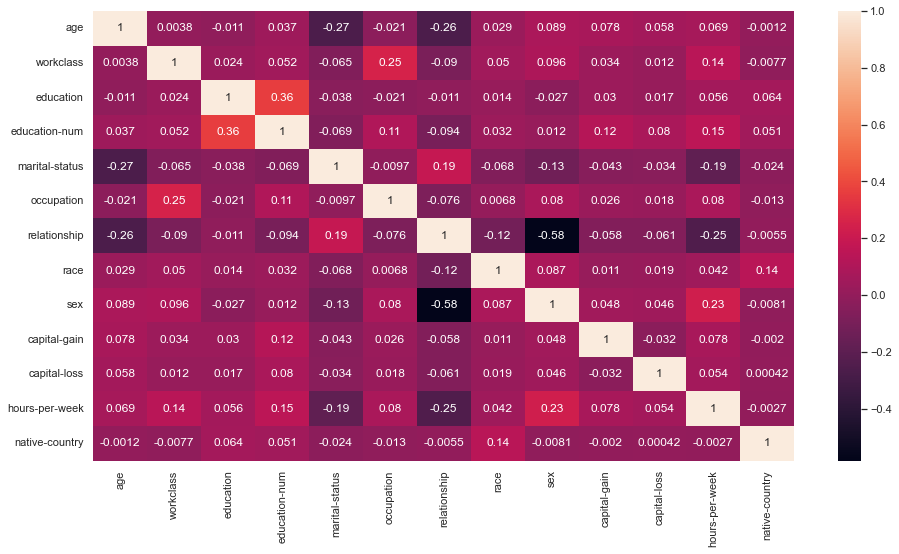

In [793]:
sb.set(rc={'figure.figsize':(15.7,8.27)})
sb.heatmap(X.corr(), annot = True)


## 1. Remove the sensitive attribute from the features

In [901]:
X_train_filtered = X_train
X_test_filtered = X_test
X_train_filtered = X_train_filtered.drop(['race','sex','marital-status','occupation','relationship'], axis=1)
X_test_filtered = X_test_filtered.drop(['race','sex','marital-status','occupation','relationship'], axis=1)
X_train_filtered.head()

,age,workclass,education-num,capital-gain,capital-loss,hours-per-week,native-country
15282,36,4,7,0,0,40,39
24870,35,4,9,0,0,54,39
18822,38,4,13,0,0,50,39
26404,50,4,9,0,0,40,39
7842,68,6,11,0,2149,40,39


In [902]:
rf = RandomForestClassifier(max_depth = 15, n_estimators=150,random_state=42, class_weight={0:1, 1:1.5}, criterion='entropy')
rf.fit(X_train, y_train)
y_rf = rf.predict(X_test)
print(classification_report(y_test,y_rf))
# less number of 1's are correctly predicted here

/var/folders/rd/wm2slzb53hs1_y4mhlc9ctvh0000gn/T/ipykernel_61306/3945054187.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


              precision    recall  f1-score   support

           0       0.90      0.91      0.91      4918
           1       0.72      0.70      0.71      1595

    accuracy                           0.86      6513
   macro avg       0.81      0.81      0.81      6513
weighted avg       0.86      0.86      0.86      6513



In [903]:
print(get_demograhic_parity(X_test['sex'].to_numpy(),y_rf, 2,"sex"))
print(get_demograhic_parity(X_test['race'].to_numpy(),y_rf,2,"race"))

Calculating disparity for  sex
count of classes [0,1]:  [2164, 4349]
count of 1's in classes [0,1]:  [224, 1330]
probability for class 0  is:  0.10351201478743069
probability for class 1  is:  0.3058174292940906

Disparity for attribute sex :  0.20230541450665993
None
Calculating disparity for  race
count of classes [0,1]:  [56, 216]
count of 1's in classes [0,1]:  [7, 53]
probability for class 0  is:  0.125
probability for class 1  is:  0.24537037037037038

Disparity for attribute race :  0.12037037037037038
None


In [907]:
df_fairness['predictions'] = pd.DataFrame(y_rf).set_index(df_fairness.index)
rf_opportunity_sex = equalOpportunity(df_fairness,'sex')
rf_opportunity_race = equalOpportunity(df_fairness,'race')
print("equal opportunity for attribute sex: ", rf_opportunity_sex)
print("equal opportunity for attribute race: ", rf_opportunity_race)

equal opportunity for attribute sex:  0.10489429628626867
equal opportunity for attribute race:  0.025000000000000022


In [908]:
knn_oddsAttribute_sex = equalizedOdds(df_fairness, 'sex')
knn_OddsAttribute_race = equalizedOdds(df_fairness, 'race')

print("\nequality of odds (true positive) for sex: ", knn_oddsAttribute_sex[0])
print("equality of odds (false positive) for sex: ", knn_oddsAttribute_sex[1])
print("\nequality of odds (true positive) for race: ", knn_OddsAttribute_race[0])
print("equality of odds (false positive) for race: ", knn_OddsAttribute_race[1])


equality of odds (true positive) for sex:  0.10489429628626867
equality of odds (false positive) for sex:  0.09250219470559012

equality of odds (true positive) for race:  0.025000000000000022
equality of odds (false positive) for race:  0.11516563146997931
